In [155]:
import ToolBox as tb
import numpy as np
import pandas as pd


In [156]:
df = pd.read_csv ('Data/diabetes_limp.csv')
df

,chol,stab.glu,hdl,glyhb,location,age,gender,weight,bp.1s,bp.1d
0,203.0,82,56.0,4.310000,Buckingham,46,female,121.0,118.0,59.0
1,165.0,97,24.0,4.440000,Buckingham,29,female,218.0,112.0,68.0
2,228.0,92,37.0,4.640000,Buckingham,58,female,256.0,190.0,92.0
3,78.0,93,12.0,4.630000,Buckingham,67,male,119.0,110.0,50.0
4,249.0,90,28.0,7.720000,Buckingham,64,male,183.0,138.0,80.0
...,...,...,...,...,...,...,...,...,...,...
378,301.0,90,118.0,4.280000,Louisa,89,female,115.0,218.0,90.0
379,296.0,369,46.0,16.110001,Louisa,53,male,173.0,138.0,94.0
380,284.0,89,54.0,4.390000,Louisa,51,female,154.0,140.0,100.0
381,194.0,269,38.0,13.630000,Louisa,29,female,167.0,120.0,70.0


In [157]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      383 non-null    float64
 1   stab.glu  383 non-null    int64  
 2   hdl       383 non-null    float64
 3   glyhb     383 non-null    float64
 4   location  383 non-null    object 
 5   age       383 non-null    int64  
 6   gender    383 non-null    object 
 7   weight    383 non-null    float64
 8   bp.1s     383 non-null    float64
 9   bp.1d     383 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 30.0+ KB


In [158]:
tb.describe_df (df)

,chol,stab.glu,hdl,glyhb,location,age,gender,weight,bp.1s,bp.1d
DATA_TYPE,float64,int64,float64,float64,object,int64,object,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,152,114,75,235,2,68,2,138,71,56
CARDIN (%),39.69,29.77,19.58,61.36,0.52,17.75,0.52,36.03,18.54,14.62


In [159]:
tb.tipifica_variables (df, 10, 40)

,nombre_variable,tipo_sugerido
0,chol,Numérica Discreta
1,stab.glu,Numérica Discreta
2,hdl,Numérica Discreta
3,glyhb,Numérica Continua
4,location,Binaria
5,age,Numérica Discreta
6,gender,Binaria
7,weight,Numérica Discreta
8,bp.1s,Numérica Discreta
9,bp.1d,Numérica Discreta


In [160]:
df_numerico = df.drop(['gender', 'location'], axis=1)

tb.get_features_num_regression (df_numerico, 'glyhb', 0.3)

['stab.glu', 'glyhb', 'age']

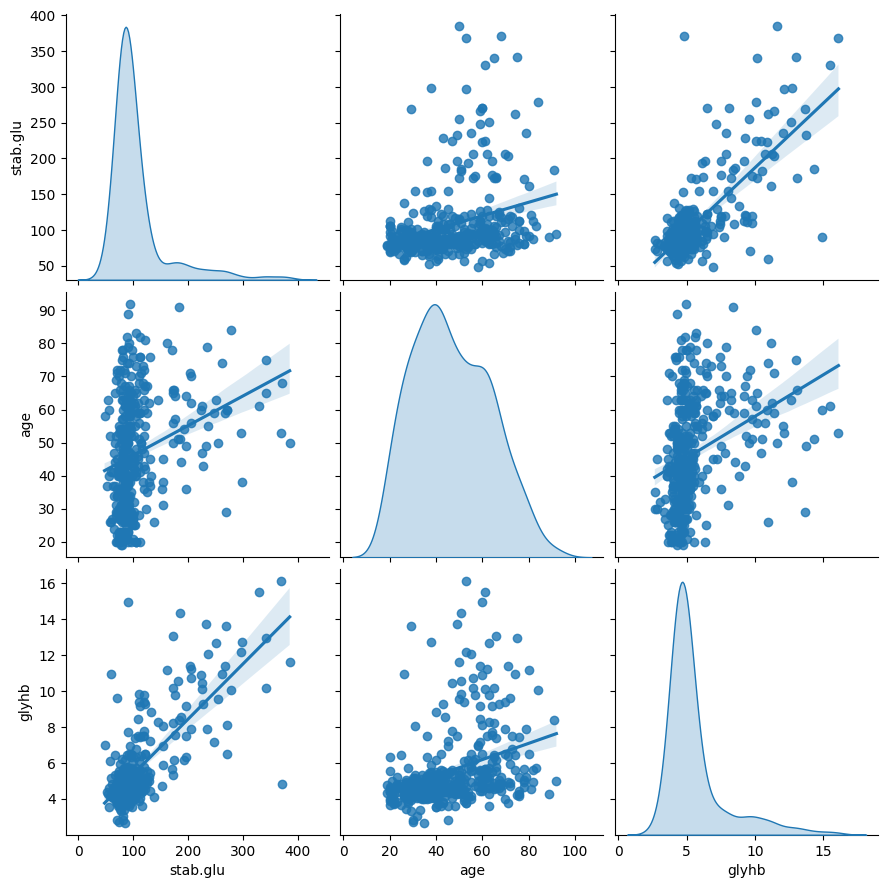

['stab.glu', 'age']

In [161]:
tb.plot_features_num_regression (df, target_col = 'glyhb', umbral_corr= 0.3)

In [162]:
tb.get_features_num_regression (df_numerico, 'glyhb', 0.2)

['chol', 'stab.glu', 'glyhb', 'age', 'bp.1s']

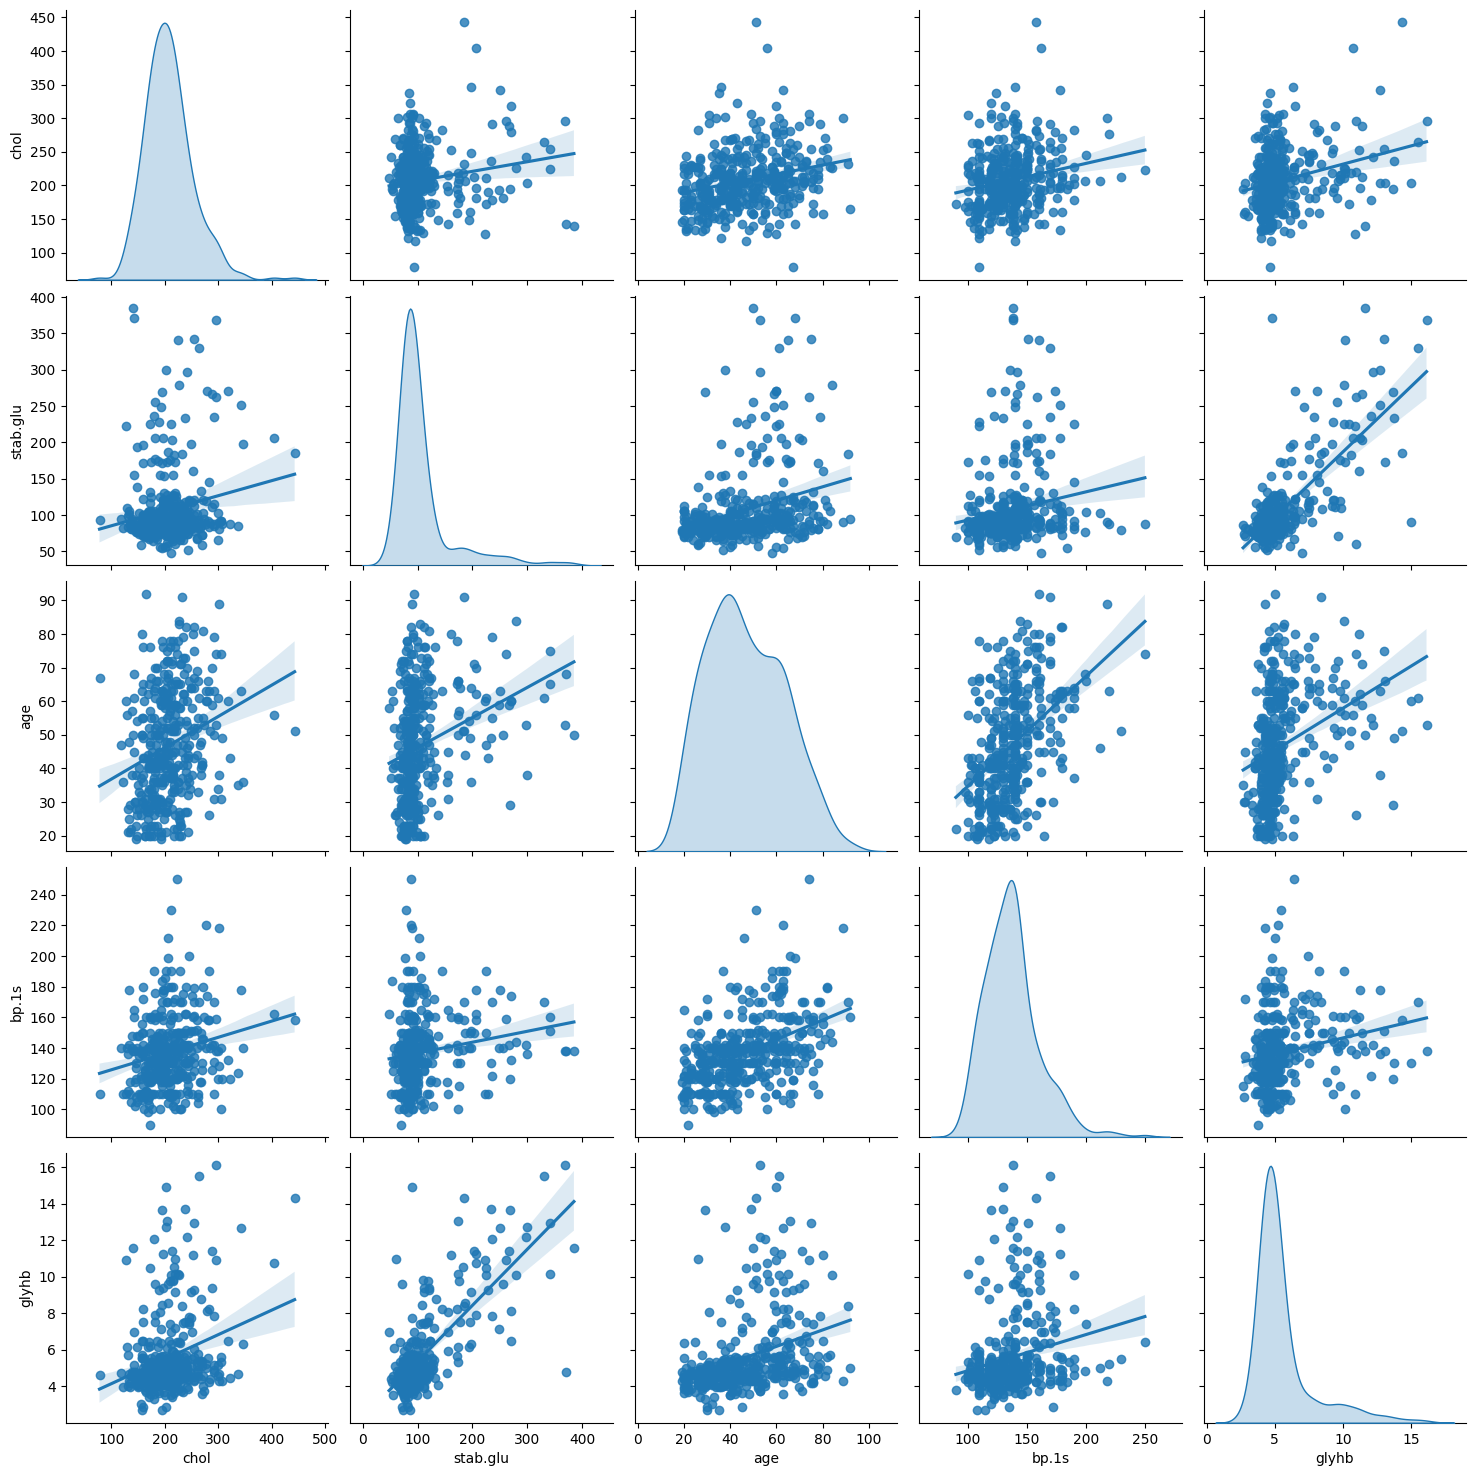

['chol', 'stab.glu', 'age', 'bp.1s']

In [163]:
tb.plot_features_num_regression (df, target_col = 'glyhb', umbral_corr= 0.2)

In [164]:
tb.get_features_cat_regression (df, target_col= 'glyhb', pvalue= 0.5)

['location', 'gender']

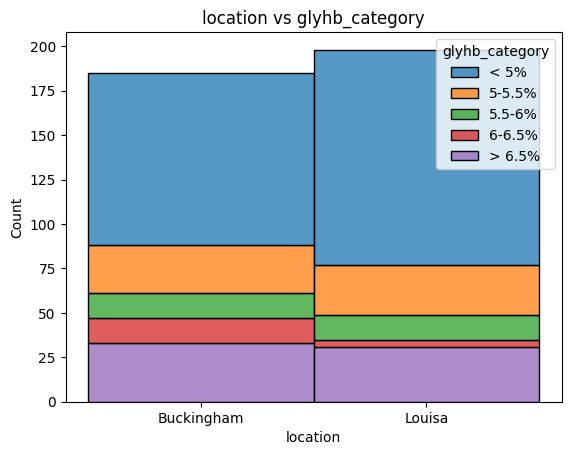

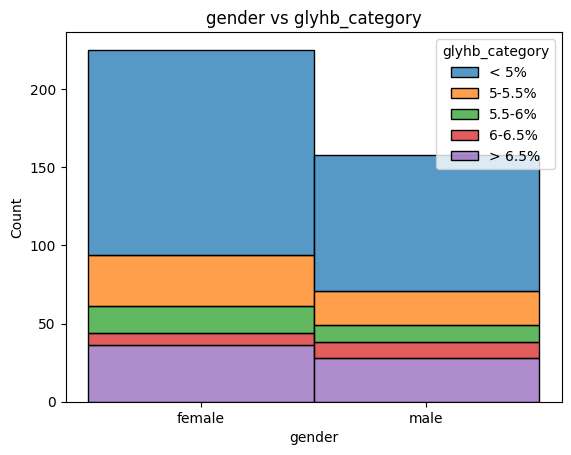

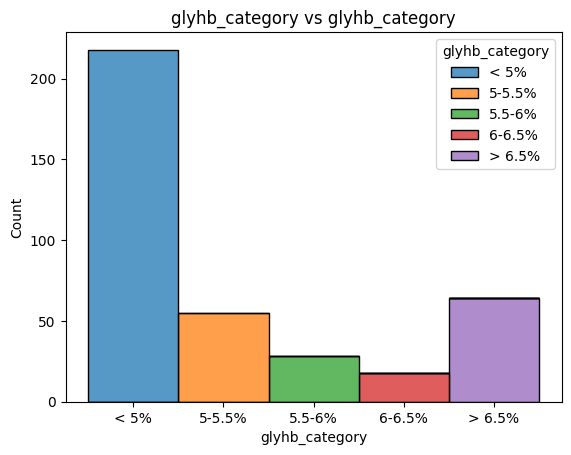

['location', 'gender', 'glyhb_category']

In [165]:
# Agrupar los valores del target debido a que tiene una alta fragmentacion

# Definir los límites de los intervalos para 'glyhb'
intervalos = [0, 5, 5.5, 6, 6.5, float('inf')] 

# Definir etiquetas para los intervalos
etiquetas = ['< 5%', '5-5.5%', '5.5-6%', '6-6.5%', '> 6.5%']

# Crear una nueva columna 'glyhb_category' basada en los intervalos y etiquetas
df['glyhb_category'] = pd.cut(df['glyhb'], bins=intervalos, labels=etiquetas, right=False)

# Filtrar el DataFrame para trabajar solo con valores específicos de 'glyhb_category'
relevant_values = etiquetas
relevant_data = df[df['glyhb_category'].isin(relevant_values)]

# Utilizar la nueva columna de categoría en lugar de la columna original
tb.plot_features_cat_regression(dataframe=relevant_data, target_col='glyhb_category', pvalue=0.05)



In [171]:
media_basal_por_hemoglobina = df.groupby('glyhb_category', observed=False)['stab.glu'].mean()

print("Media de la columna 'basal' por valor de 'hemoglobina':")
print(media_basal_por_hemoglobina)


Media de la columna 'basal' por valor de 'hemoglobina':
glyhb_category
< 5%       87.651376
5-5.5%     93.581818
5.5-6%     99.000000
6-6.5%    111.111111
> 6.5%    188.812500
Name: stab.glu, dtype: float64
